# Analyse de la base de données des noms de lacs au Québec

** Fichier fourni par la Commission de toponymie du Québec **

In [2]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm

In [3]:
lacs = pd.read_csv("17-06_lacs2.csv", parse_dates=['date'])

In [4]:
lacs.head(1)

,Unnamed: 0,id,nom_complet,latitude,Longitude,date,ville,origine_ling1,origine_ling2,origine_ling_amer
0,0,228224,Lac 3.1416,49° 45' 07'',68° 06' 48'',1996-03-29,Rivière-aux-Outardes,Français,NaN,NaN


## Renommer les noms de colonnes

In [5]:
lacs.rename(columns={'No Séquentiel' : 'id', 'Nom du lieu' : 'nom_inverse', 'Entité' : 'entite', 'Latitude':'latitude','longitude':'longitude','Feuillet':'feuillet','Municipalité':'ville','Note pour le Web':'notes','Origine linguistique 1':'origine_ling1','Origine linguistique 2':'origine_ling2','Origine linguistique amérindienne':'origine_ling_amer'}, inplace=True)


In [5]:
lacs.head(1)

,id,nom_inverse,nom_complet,entite,latitude,Longitude,feuillet,date,ville,notes,origine_ling1,origine_ling2,origine_ling_amer
0,228224,"3.1416, Lac",Lac 3.1416,Lac,49° 45' 07'',68° 06' 48'',22F/16,1996-03-29,Rivière-aux-Outardes,"Ce nom, en usage depuis la fin des années 1980...",Français,NaN,NaN


In [6]:
lacs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63017 entries, 0 to 63016
Data columns (total 10 columns):
Unnamed: 0           63017 non-null int64
id                   63017 non-null int64
nom_complet          63017 non-null object
latitude             63017 non-null object
Longitude            63017 non-null object
date                 63017 non-null datetime64[ns]
ville                63017 non-null object
origine_ling1        63017 non-null object
origine_ling2        6813 non-null object
origine_ling_amer    3703 non-null object
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 4.8+ MB


## Noms de lacs les plus répandus

In [7]:
lacs.nom_complet.value_counts()

Lac Long                   167
Lac Rond                   143
Lac à la Truite            114
Lac Croche                 101
Lac Noir                   100
Lac Perdu                   99
Lac des Îles                89
Lac Vert                    88
Lac du Castor               80
Lac Paul                    80
Lac Clair                   79
Lac Castor                  77
Lac à l' Ours               72
Lac Brûlé                   71
Lac Caché                   63
Lac en Cœur                 61
Lac Pierre                  61
Lac de la Montagne          60
Lac de la Tour              60
Lac à Foin                  58
Lac André                   56
Lac Georges                 56
Lac Carré                   55
Lac Claude                  54
Lac Blanc                   53
Lac Roger                   52
Lac Creux                   52
Lac Louis                   52
Lac Robert                  52
Lac Gagnon                  50
                          ... 
Lac Wanìke                   1
Lac Ferl

In [8]:
lacs.nom_complet.value_counts().reset_index()

,index,nom_complet
0,Lac Long,167
1,Lac Rond,143
2,Lac à la Truite,114
3,Lac Croche,101
4,Lac Noir,100
5,Lac Perdu,99
6,Lac des Îles,89
7,Lac Vert,88
8,Lac Paul,80
9,Lac du Castor,80


In [9]:
lacs.head()

,id,nom_inverse,nom_complet,entite,latitude,Longitude,feuillet,date,ville,notes,origine_ling1,origine_ling2,origine_ling_amer
0,228224,"3.1416, Lac",Lac 3.1416,Lac,49° 45' 07'',68° 06' 48'',22F/16,1996-03-29,Rivière-aux-Outardes,"Ce nom, en usage depuis la fin des années 1980...",Français,NaN,NaN
1,394284,"4-H, Lac des",Lac des 4-H,Lac,48° 27' 58'',78° 12' 15'',32D/08,2006-03-07,Saint-Mathieu-d'Harricana,Cette appellation a été donnée parce que les m...,Français,Français,NaN
2,112975,"4-H, Lac des",Lac des 4-H,Lac,47° 23' 52'',68° 59' 43'',21N/07,2006-03-07,Rivière-Bleue,Le club 4-H tient des acitivités éducatives à ...,Français,Français,NaN
3,378600,7e Lac,7e Lac,Lac,46° 08' 13'',73° 49' 10'',31I/04,2003-02-27,Chertsey,Ce lac est mieux connu sous la forme 7e Lac. C...,Français,NaN,NaN
4,375600,"9, Lac du",Lac du 9,Lac,49° 38' 32'',73° 04' 39'',32H/11,2002-06-11,Rivière-Mistassini,"Ce toponyme, utilisé depuis les années 1970, e...",Français,NaN,NaN


In [10]:
lacs.head()

,id,nom_inverse,nom_complet,entite,latitude,Longitude,feuillet,date,ville,notes,origine_ling1,origine_ling2,origine_ling_amer
0,228224,"3.1416, Lac",Lac 3.1416,Lac,49° 45' 07'',68° 06' 48'',22F/16,1996-03-29,Rivière-aux-Outardes,"Ce nom, en usage depuis la fin des années 1980...",Français,NaN,NaN
1,394284,"4-H, Lac des",Lac des 4-H,Lac,48° 27' 58'',78° 12' 15'',32D/08,2006-03-07,Saint-Mathieu-d'Harricana,Cette appellation a été donnée parce que les m...,Français,Français,NaN
2,112975,"4-H, Lac des",Lac des 4-H,Lac,47° 23' 52'',68° 59' 43'',21N/07,2006-03-07,Rivière-Bleue,Le club 4-H tient des acitivités éducatives à ...,Français,Français,NaN
3,378600,7e Lac,7e Lac,Lac,46° 08' 13'',73° 49' 10'',31I/04,2003-02-27,Chertsey,Ce lac est mieux connu sous la forme 7e Lac. C...,Français,NaN,NaN
4,375600,"9, Lac du",Lac du 9,Lac,49° 38' 32'',73° 04' 39'',32H/11,2002-06-11,Rivière-Mistassini,"Ce toponyme, utilisé depuis les années 1970, e...",Français,NaN,NaN


## Comptabilisation des lacs par langue

In [11]:
lacs["origine_ling1"].value_counts()

Français         47468
Anglais           6830
Amérindien        4031
Autre             1475
Indifférencié     1356
Inuktitut          921
Inconnu            913
Hybride             23
Name: origine_ling1, dtype: int64

In [12]:
compte_langues = lacs["origine_ling1"].value_counts()

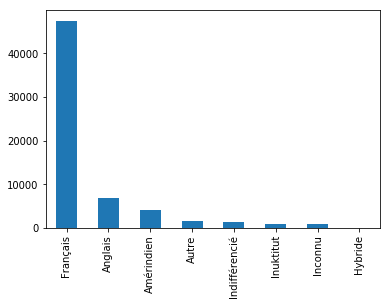

In [13]:
axis_bgcolor = '#f0f0f0'
compte_langues.plot(kind="bar")

#plt.gca().invert_xaxis()

#définition des options des axes
#plt.xlabel('Date')
#plt.ylabel('Nb de lacs')
#plt.title('Attribution de noms aux lacs')
#plt.ylim(0, 4000)   

## Comptabilisation des lacs par municipalité

In [14]:
lacs["ville"].value_counts()

La Tuque                        4305
Mont-Valin                      4123
Lac-Ashuapmushuan               3702
Eeyou Istchee Baie-James        3044
Lac-au-Brochet                  2838
Senneterre                      2165
Lac-Walker                      2150
Rivière-aux-Outardes            2089
Les Lacs-du-Témiscamingue       2028
Lac-Pythonga                    1918
Lac-Nilgaut                     1680
Rivière-Koksoak                 1598
Réservoir-Dozois                1573
Rivière-Mistassini              1165
Passes-Dangereuses              1076
Lac-Jacques-Cartier              846
Lac-Normand                      741
Baie-d'Hudson                    681
Lac-Pikauba                      654
Baie-de-la-Bouteille             565
Lac-Jérôme                       527
Lac-Croche                       479
Lac-Douaire                      473
Rivière-de-la-Savane             428
Lac-Oscar                        423
Lac-Lenôtre                      408
Petit-Mécatina                   387
L

## Comptabilisation des lacs par langue amérindienne

In [15]:
lacs["origine_ling_amer"].value_counts().reset_index()

,index,origine_ling_amer
0,Cri,1590
1,Innu,689
2,Algonquin,630
3,Attikamek,417
4,Naskapi,138
5,Micmac,133
6,Abénaquis,42
7,Wendat,34
8,Mohawk,22
9,Malécite,8


In [16]:
compte_date = lacs["date"].value_counts()

(717337.0, 736517.5017983828)

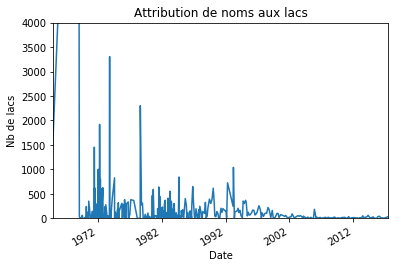

In [17]:
#import de la fonction pour la formule
import datetime as datetime 

axis_bgcolor = '#f0f0f0'
compte_date.plot(kind="line")

#définition des options des axes
plt.xlabel('Date')
plt.ylabel('Nb de lacs')
plt.title('Attribution de noms aux lacs')
plt.ylim(0, 4000)    

#Traitement de la date
datenow = datetime.datetime.now()
dstart = datetime.datetime(1965, 1, 1)
plt.xlim(dstart, datenow)    

In [18]:
compte_langues_amer = lacs["origine_ling_amer"].value_counts()

In [19]:
compte_langues_amer.head(3)

Cri          1590
Innu          689
Algonquin     630
Name: origine_ling_amer, dtype: int64

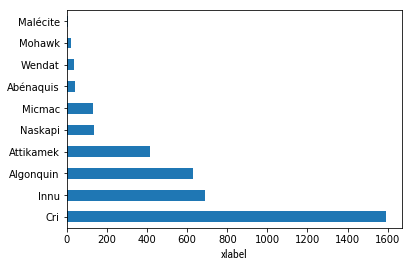

In [20]:
axis_bgcolor = '#f0f0f0'
font = {'fontname':'Roboto'}

#ceci donne un graph vertical
#compte_langues_amer.plot(kind="bar")

#cela un horizontal
compte_langues_amer.plot.barh()

#définition des options des axes
plt.xlabel('xlabel', **font)

#plt.xlabel('Date')
#plt.ylabel('Nb de lacs')
#plt.title('Attribution de noms aux lacs')
#plt.ylim(0, 4000)     

In [21]:
#compte_date.reset_index().sort_values("date", ascending=True)
compte_date.reset_index().sort_values(by='date')


,index,date
427,1973-12-24,1
355,1983-06-01,1
356,1973-10-04,1
357,1971-02-27,1
358,1969-12-05,1
359,1975-03-28,1
360,1983-02-02,1
361,1972-02-12,1
362,1971-08-21,1
363,1985-05-28,1


In [22]:
lacs.drop(['notes','nom_inverse','entite','feuillet'],axis=1).to_csv('17-06_lacs2.csv')